### Student Information
Name: Lindsey Anne Yu 楊真珠

Student ID: 112065423

GitHub ID: LindseyAnneYu

Kaggle name: Lindsey Anne Yu

Kaggle private scoreboard snapshot: 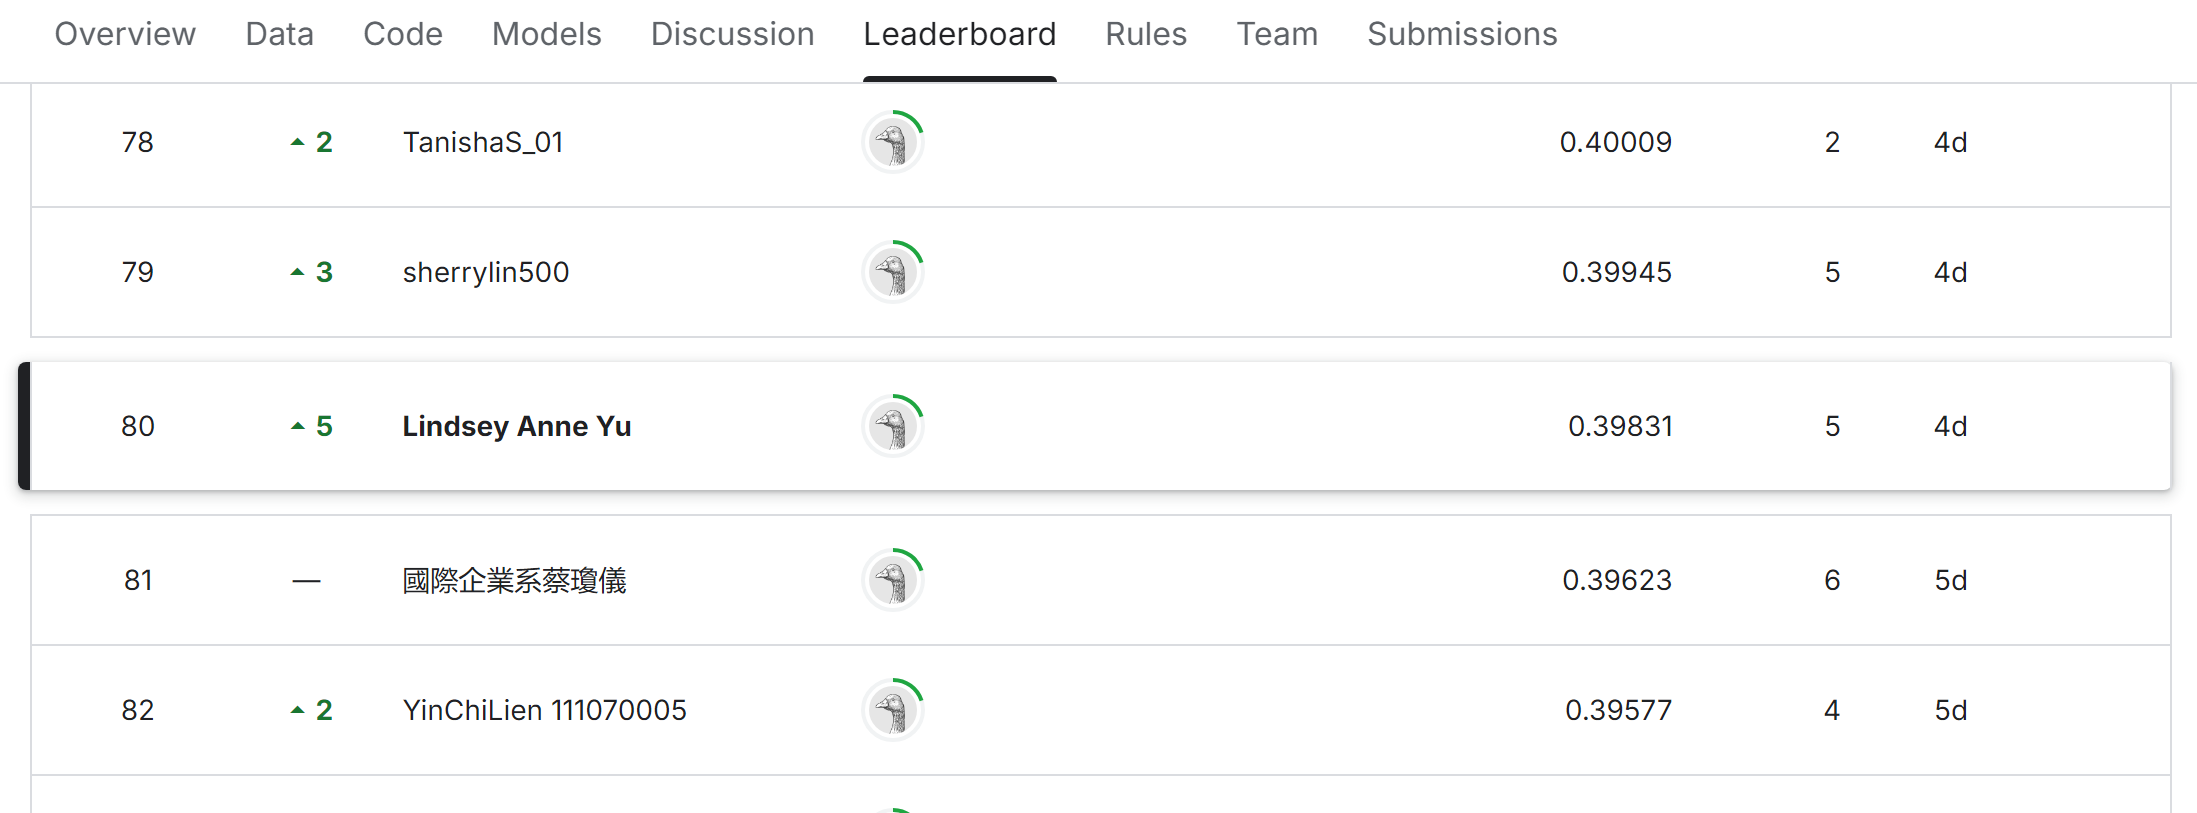

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__.

In [1]:
# Since I'm using colab, I found a tutorial online for installing ollama with adalflow
# The given installation process for ollama 3.2 doesn't work, so I used this model as an alternative
# my installation is limited to Llama 3.1 8B
# https://www.youtube.com/watch?v=rV0yqqQeeLw

!sudo apt-get install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh # download ollama api
from IPython.display import clear_output

# Create a Python script to start the Ollama API server in a separate thread

import os
import threading
import subprocess
import requests
import json

def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids
The following NEW packages will be installed:
  libpci3 pci.ids pciutils
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 343 kB of archives.
After this operation, 1,581 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pci.ids all 0.0~2022.01.22-1 [251 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpci3 amd64 1:3.7.0-6 [28.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 pciutils amd64 1:3.7.0-6 [63.6 kB]
Fetched 343 kB in 0s (3,333 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initial

In [2]:
from IPython.display import clear_output
!ollama pull llama3.1:8b
!pip install -U lightrag[ollama]
clear_output()

In [3]:
from lightrag.core.generator import Generator
from lightrag.core.component import Component
from lightrag.core.model_client import ModelClient
from lightrag.components.model_client import OllamaClient

import time


qa_template = r"""<SYS>
You are a helpful assistant.
</SYS>
User: {{input_str}}
You:"""

class SimpleQA(Component):
    def __init__(self, model_client: ModelClient, model_kwargs: dict):
        super().__init__()
        self.generator = Generator(
            model_client=model_client,
            model_kwargs=model_kwargs,
            template=qa_template,
        )

    def call(self, input: dict) -> str:
        return self.generator.call({"input_str": str(input)})

    async def acall(self, input: dict) -> str:
        return await self.generator.acall({"input_str": str(input)})

In [4]:
# Testing ollama before starting the homework

from lightrag.components.model_client import OllamaClient
from IPython.display import Markdown, display
model = {
    "model_client": OllamaClient(),
    "model_kwargs": {"model": "llama3.1:8b"}
}
qa = SimpleQA(**model)
output=qa("what is happiness, answer in markdown format")
display(Markdown(f"**Answer:** {output.data}"))

**Answer:** **What is Happiness?**
======================

Happiness is a complex and multi-faceted concept that can be difficult to define. However, here's a breakdown of its key aspects:

### Definition

*   Happiness is a positive emotional state characterized by feelings of joy, contentment, and satisfaction.
*   It encompasses a range of experiences, including pleasure, excitement, relaxation, and inner peace.

### Key Components

*   **Subjective Well-being**: A person's overall assessment of their life satisfaction, happiness, and fulfillment.
*   **Positive Emotions**: Experiences of joy, gratitude, love, and other positive feelings that enhance one's quality of life.
*   **Life Satisfaction**: A general sense of contentment with one's life circumstances, relationships, and personal achievements.
*   **Meaning and Purpose**: A sense of direction, significance, or contribution to something larger than oneself.

### Factors Influencing Happiness

*   **Genetics**: Research suggests that 40-50% of individual differences in happiness are due to genetic factors.
*   **Environment**: Surroundings, relationships, and life circumstances can significantly impact one's happiness levels.
*   **Behavior**: Engaging in activities that promote happiness, such as exercise, socializing, or pursuing hobbies.
*   **Mindset**: Developing a positive outlook, practicing gratitude, and cultivating self-awareness.

### Types of Happiness

*   **Intrinsic**: Derived from internal sources, such as personal growth, relationships, or spiritual experiences.
*   **Extrinsic**: Resulting from external factors, like material possessions, social status, or career achievements.
*   **Eudaimonic**: Focused on living a meaningful, fulfilling life with purpose and direction.

Happiness is a multifaceted concept that can be influenced by various factors. By understanding its components and types, individuals can better navigate their path to happiness.

In [ ]:
# More installations and importing
!pip install umap
!pip install umap-learn
!pip install pyngrok
import threading
import time
import os
import asyncio
from pyngrok import ngrok
import threading
import queue
import time
from threading import Thread

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=044d0898954cb774df193c999bd250faeac87b544bddcc376a8f7c28c3a0042e
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd

### training data
anger_train = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/train/anger-ratings-0to1.train.txt',
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/train/sadness-ratings-0to1.train.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/train/fear-ratings-0to1.train.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/train/joy-ratings-0to1.train.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [18]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [19]:
### testing data
anger_test = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/dev/anger-ratings-0to1.dev.gold.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/dev/fear-ratings-0to1.dev.gold.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/data/semeval/dev/joy-ratings-0to1.dev.gold.txt',
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [20]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


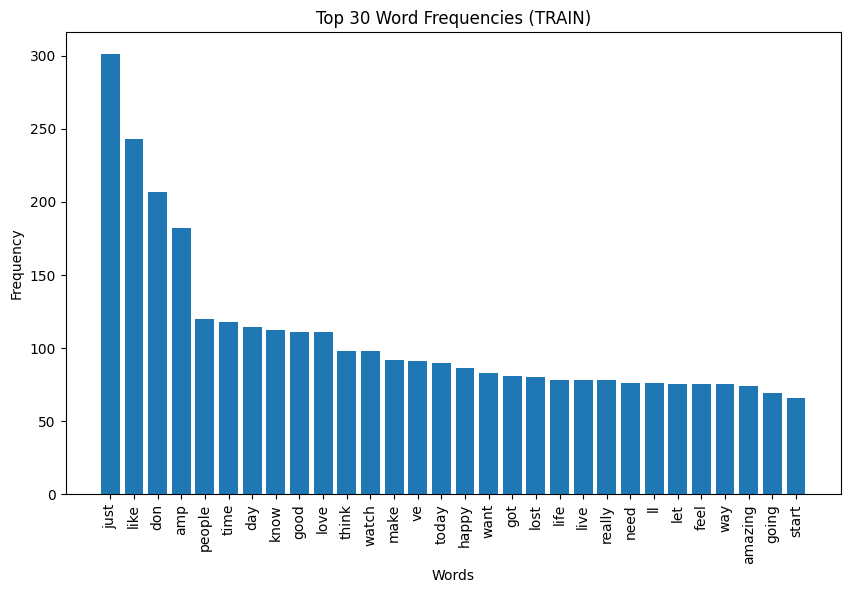

In [36]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english', max_features=30)  # Top 30 words
X_counts = count_vect.fit_transform(train_df['text'])

# Create a DataFrame of word frequencies
word_freq = pd.DataFrame({'Word': count_vect.get_feature_names_out(), 'Frequency': X_counts.toarray().sum(axis=0)})
word_freq = word_freq.sort_values(by='Frequency', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(word_freq['Word'], word_freq['Frequency'])
plt.xticks(rotation=90)
plt.title("Top 30 Word Frequencies (TRAIN)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


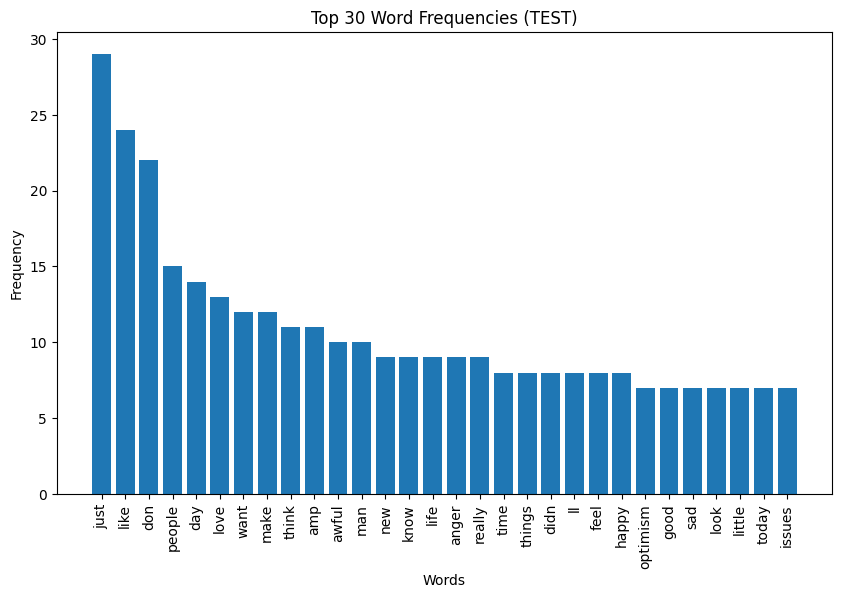

In [ ]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english', max_features=30)  # Top 30 words
X_counts = count_vect.fit_transform(test_df['text'])

# Create a DataFrame of word frequencies
word_freq = pd.DataFrame({'Word': count_vect.get_feature_names_out(), 'Frequency': X_counts.toarray().sum(axis=0)})
word_freq = word_freq.sort_values(by='Frequency', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(word_freq['Word'], word_freq['Frequency'])
plt.xticks(rotation=90)
plt.title("Top 30 Word Frequencies (TEST)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer with a limit of 1000 features
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=1000)

# Assuming 'text_column' is the name of the column with the text data
X_tfidf = tfidf_vect.fit_transform(train_df['text'])  # Replace 'text_column' with your actual column name

# Display the feature names for indices 100 to 110
feature_names = tfidf_vect.get_feature_names_out()
print("Feature Names for indices 100 to 110:", feature_names[100:110])


Feature Names for indices 100 to 110: ['blue' 'blues' 'body' 'boiling' 'book' 'boss' 'bought' 'bout' 'boy'
 'break']


In [38]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

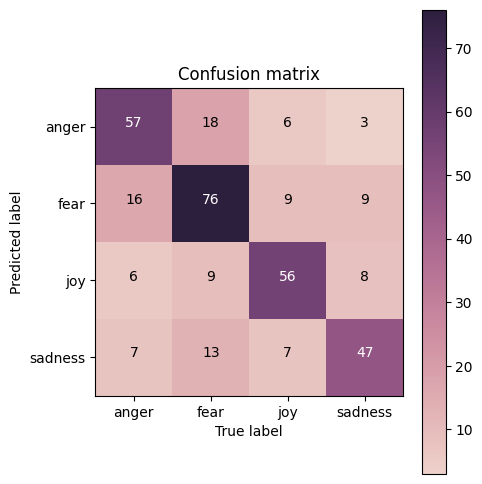

In [ ]:
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

From the training accuracy of 0.99 and testing accuracy of 0.66, it can be easily seen that there's an overfitting issue. The model shows decent but not outstanding performance, with the majority having a high accuracy as can be seen from the darker colors correctly corresponding to the predicted and true label. While joy is the best-predicted emotion, confusion between fear and anger and between sadness and fear suggests overlapping features or inadequate representations for these classes, which is understandable given that they are also negative emotions. This can be seen as a point of improvement for our model

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [40]:
# Answer here
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Naive Bayes model using the training data
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred_nb = NB_model.predict(X_train)
y_test_pred_nb = NB_model.predict(X_test)

# Calculate accuracy
acc_train_nb = accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)
acc_test_nb = accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)

# Print the accuracy results
print('Naive Bayes training accuracy: {}'.format(round(acc_train_nb, 2)))
print('Naive Bayes testing accuracy: {}'.format(round(acc_test_nb, 2)))

# Print classification report for the testing data
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_true=y_test, y_pred=y_test_pred_nb))



Naive Bayes training accuracy: 0.79
Naive Bayes testing accuracy: 0.71

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

       anger       0.65      0.67      0.66        84
        fear       0.74      0.81      0.77       110
         joy       0.77      0.70      0.73        79
     sadness       0.66      0.62      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



Confusion Matrix (Naive Bayes):
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


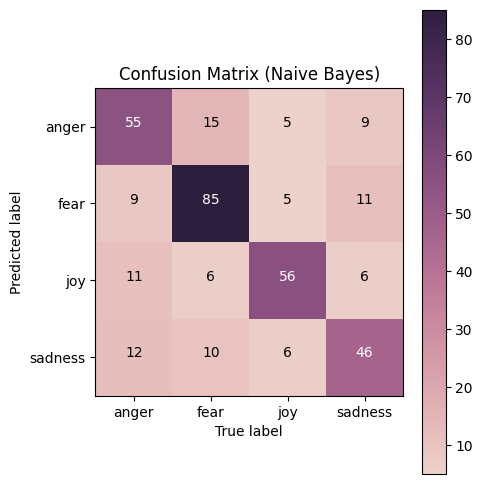

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Naive Bayes model
cm_nb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_nb)

# Print the confusion matrix
print("Confusion Matrix (Naive Bayes):")
print(cm_nb)

# Visualize the confusion matrix using the provided plot function
plot_confusion_matrix(cm_nb, classes=list(np.unique(y_test)), title='Confusion Matrix (Naive Bayes)')


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The decision tree model has a very high training accuracy of 0.99, indicating potential overfitting, whereas the nb model has a training accuracy of 0.79, which is more realistic and indicates less overfitting. nb shows a slight improvement in unseen data (testing), while decision tree shows higher confusion across classes, especially with fear being misclassified as anger or joy. But with nb, misclassifications are more evenly distributed, and the model shows better recognition of joy. For this dataset, nb seems to perform better overall due to its higher testing accuracy, more balanced precision/recall, and less overfitting compared to the decision tree.



---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

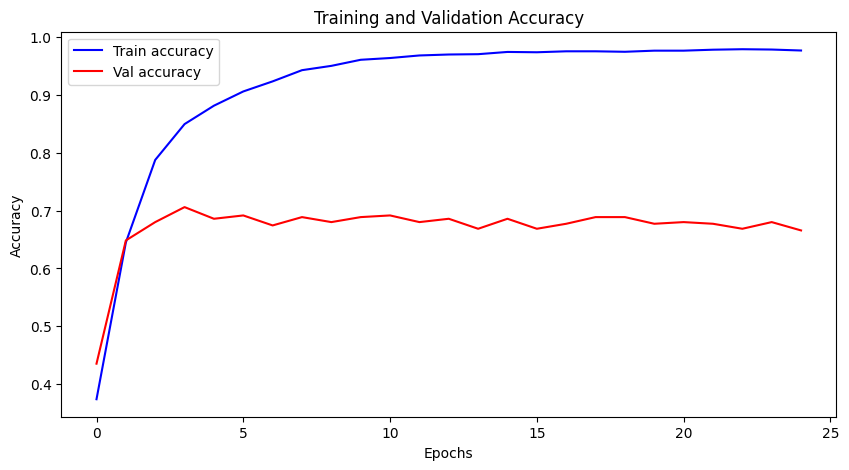

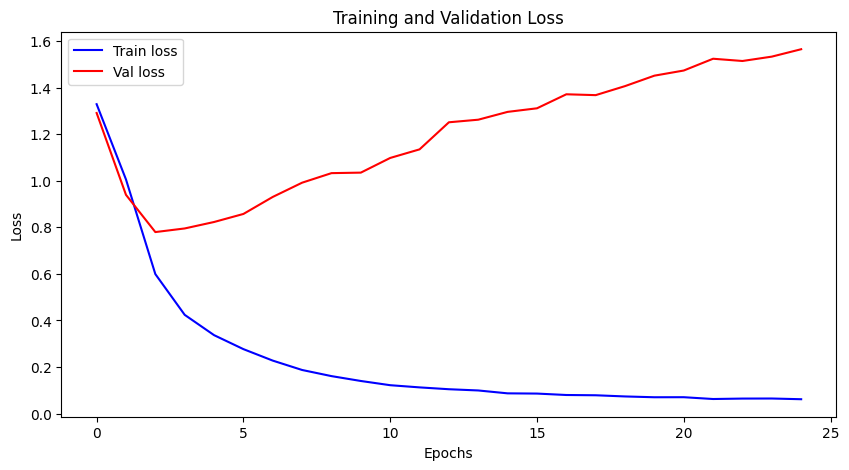

In [61]:
# Answer here
import matplotlib.pyplot as plt
import pandas as pd

# Load the training log CSV
training_log = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/logs/training_log.csv')

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy', color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_log['epoch'], training_log['loss'], label='Train loss', color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


#The behavior seen in these graphs is a clear sign of overfitting.
#The model has learned to perform extremely well on the training data (high training accuracy, low training loss)
#but is not able to generalize to the validation set (low validation accuracy, increasing validation loss).
#This means the model has memorized the training data but has not learned general patterns that can be applied to new, unseen data.
#Underfitting would be indicated by both training and validation accuracies being low and/or losses being high,
#suggesting that the model is too simple to capture the underlying structure of the data.
# this is visible at the leftmost side of the graph, where accuracy is incredibly low when the model is still simple

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

## create the training corpus
training_corpus = train_df['text_tokenized'].values

## training
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/GoogleNews-vectors-negative300.bin.gz'
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
##option 1/2 Average Word Embeddings = Compute the mean (average) of the word vectors for all words in a sentence.

import numpy as np

def average_word_vectors(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

train_df['sentence_vector'] = train_df['text_tokenized'].apply(lambda x: average_word_vectors(x, word2vec_model))



In [ ]:
## Option 2/2 TF-IDF Weighted Word Embeddings = TF-IDF score to give more importance to informative words ** my preference

from sklearn.feature_extraction.text import TfidfVectorizer

# Train TF-IDF on the corpus
tfidf = TfidfVectorizer()
tfidf.fit(train_df['text'])

# Create a dictionary mapping each word to its TF-IDF weight
tfidf_weights = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

def tfidf_weighted_word_vectors(sentence, model, tfidf_weights):
    vectors = [model.wv[word] * tfidf_weights.get(word, 0) for word in sentence if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

train_df['sentence_vector_tfidf'] = train_df['text_tokenized'].apply(lambda x: tfidf_weighted_word_vectors(x, word2vec_model, tfidf_weights))


## Clustering

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_


### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

angry_words: ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words: ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words: ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words: ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

Target words:
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exaspe

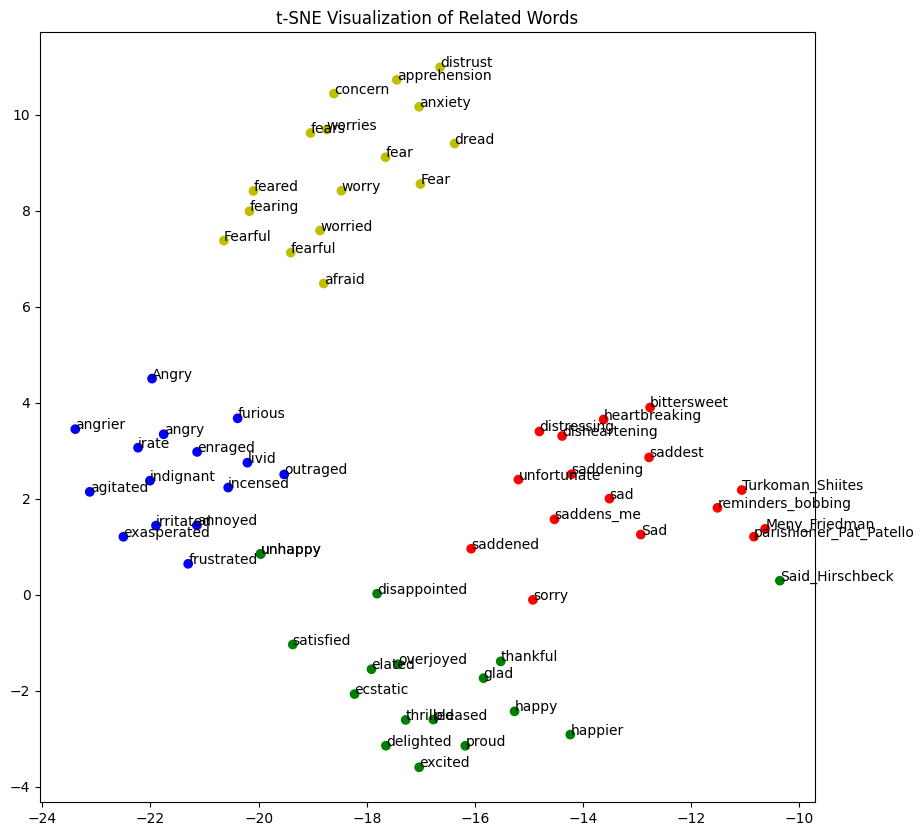

In [ ]:
# Define the main words
emotion_words = ['angry', 'happy', 'sad', 'fear']

# Generate the lists of 15 most similar words for each main word
topn = 15
emotion_word_lists = {word: [word] + [word_ for word_, sim_ in w2v_google_model.most_similar(word, topn=topn)]
                      for word in emotion_words}

# Print the lists for verification
for emotion, words in emotion_word_lists.items():
    print(f'{emotion}_words:', words)

# Combine all words into one target list
target_words = [word for words in emotion_word_lists.values() for word in words]

# Print combined target words
print('\nTarget words:')
print(target_words)

# Generate a color list for visualization
color = ['b'] * (topn + 1) + ['g'] * (topn + 1) + ['r'] * (topn + 1) + ['y'] * (topn + 1)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Prepare the word vectors for the target words
size = 200
target_size = len(target_words)
all_word = list(w2v_google_model.index_to_key)
word_train = target_words + all_word[:size]
X_train = w2v_google_model[word_train]

# Train t-SNE
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)

# Plot t-SNE result
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("t-SNE Visualization of Related Words")
plt.show()



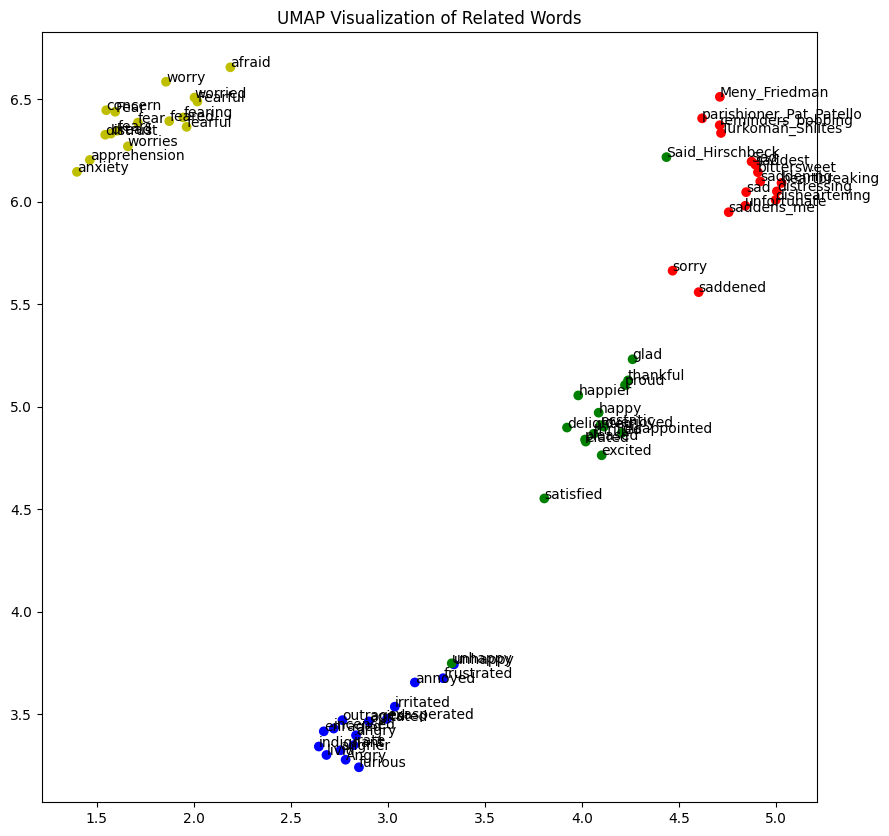

In [ ]:
import umap.umap_ as umap

# Train UMAP
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)

# Plot UMAP result
plt.figure(figsize=(10, 10))
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("UMAP Visualization of Related Words")
plt.show()


# In terms of granularity, I feel like t-SNE excels in preserving local structures and fine details
# t-SNE making it easier to see small differences within clusters
# UMAP clusters are more distinct, but some words are getting mixed with other clusters due to semantic overlap,
# or possibly also due to UMAP's approach to preserving both local and global structures

## LLM

In [5]:
from IPython.display import display, Markdown, Latex

# ollama.chat function uses the role parameter to define the context or purpose of a message within a conversation.
# For example, user represents the end-user asking questions or providing input.
# Assistant represents the AI model providing responses.
# System provides initial instructions or context to guide the behavior of the assistant.
# Sample prompt:

model = {
    "model_client": OllamaClient(),
    "model_kwargs": {"model": "llama3.1:8b"}
}

# Initialize SimpleQA or an equivalent component
qa = SimpleQA(**model)

# Define a conversation with roles
messages = [
    {"role": "system", "content": "You are a teacher specializing in computer science."},
    {"role": "user", "content": "What is data mining? (in markdown format)"},
    {"role": "assistant", "content": "Let me explain! Data mining involves..."}
]

# Convert the messages into a format compatible with SimpleQA
conversation = "\n".join([f"{message['role']}: {message['content']}" for message in messages])

# Query the model using the conversation
output = qa(conversation)

# Print the assistant's response
print(output.data)

**Data Mining**

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques to identify hidden trends, predict future behavior, and extract valuable knowledge from complex data.

### Key Characteristics:

* **Exploratory**: Data mining involves exploring and understanding the structure and relationships within a dataset.
* **Automated**: The process is automated, using algorithms and statistical models to analyze large amounts of data.
* **Discovery-oriented**: The goal is to discover new insights, patterns, and relationships that were previously unknown.

### Applications:

* **Business Intelligence**: Data mining can help companies identify trends in customer behavior, optimize marketing strategies, and predict sales patterns.
* **Scientific Research**: Researchers use data mining to analyze large datasets from various fields, such as biology, medicine, and climate science.
* **Security**: Da


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [6]:
# ollama.chat function uses the role parameter to define the context or purpose of a message within a conversation.
# For example, user represents the end-user asking questions or providing input.
# Assistant represents the AI model providing responses.
# System provides initial instructions or context to guide the behavior of the assistant.
# Sample prompt:

model = {
    "model_client": OllamaClient(),
    "model_kwargs": {"model": "llama3.1:8b"}
}

# Initialize SimpleQA or an equivalent component
qa = SimpleQA(**model)

# Define a conversation with roles
messages = [
    {"role": "system", "content": "You are a teacher specializing in computer science."},
    {"role": "user", "content": "What is data mining? (in markdown format)"},
    {"role": "assistant", "content": "Let me explain! Data mining involves..."}
]

# Convert the messages into a format compatible with SimpleQA
conversation = "\n".join([f"{message['role']}: {message['content']}" for message in messages])

# Query the model using the conversation
output = qa(conversation)

# Print the assistant's response
print(output.data)

# Data Mining
### A Process of Extracting Insights from Large Datasets

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It's a multidisciplinary field that combines techniques from computer science, statistics, and domain-specific knowledge.

## Steps in Data Mining

1. **Problem Definition**: Identify the problem or opportunity for improvement
2. **Data Collection**: Gather relevant data from various sources
3. **Data Cleaning**: Preprocess the data to ensure quality and consistency
4. **Pattern Discovery**: Use algorithms and statistical techniques to identify patterns and relationships
5. **Pattern Evaluation**: Assess the significance and relevance of the discovered patterns
6. **Knowledge Representation**: Present the findings in a meaningful and actionable way

## Applications of Data Mining

Data mining has numerous applications across various industries, including:

* Customer segmentation and targeting
* Predic

In [7]:
# needed to change to llava. im using colab, and llava-phi3 wont pull properly
!ollama pull llava

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠸ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠏ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠸ pulling manifest ⠼ pulling manifest 
pulling 170370233dd5...   0% ▕▏    0 B/4.1 GB                  pulling manifest 
pulling 170370233dd5...   0% ▕▏    0 B/4.1 GB                  pulling manifest 
pulling 170370233dd5...   0% ▕▏    0 B/4.1 GB                  pulling manifest 
pulling 170370233dd5...   0% ▕▏    0 B/4.1 GB                  pulling manifest 
pulling 170370233dd5...   0% ▕▏ 8.3 MB/4.1 GB                  pulling manifest 
pulling 170370233dd5...   1% ▕▏  32 MB/4.1 GB                  pulling manifest 
pulling 170370233dd5...   1% ▕▏  51 MB/4.1 GB                  pulling manifest 
pulling 170370233dd5...   2% ▕▏  77 MB/4.1 GB                  pulling manifest 
pulling 170370233dd5...   2% ▕▏  98 MB/4.1 GB    


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

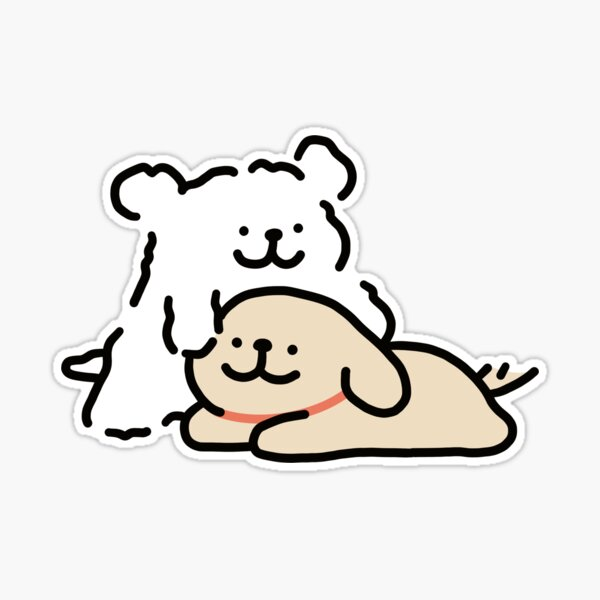

 The image shows an illustration of two dogs with their human counterparts. On the left, there's a white dog sitting upright on its hind legs, seemingly standing on its hind legs next to what appears to be a brown and white teddy bear. On the right, there's a brown dog lying down, resting its head on a light-colored surface that could be a couch or floor. The image has a cute and whimsical style, often associated with internet memes or digital illustrations. It features simple line art, with minimal detailing in the characters and objects. There is no text present in the image. 

In [12]:
from IPython.display import Image, display
import ollama

image_path = "/content/drive/MyDrive/Colab Notebooks/DM Lab 2/pics/example adi.jpg"

display(Image(filename=image_path))

response3 = ollama.chat(model='llava', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [r"/content/drive/MyDrive/Colab Notebooks/DM Lab 2/pics/example adi.jpg"] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

# The description I can say is 90%+ accurate. The part it got wrong was saying the image is of two bears
# but it was able to correctly identify the emotion, which is affection
# When I reran the prompt, it was able to identify that the image contains a dog, but still thinks the other one is a bear
# it works relatively well because of the functioning of A pre-trained vision model and a language model, but this is also because
# the image I sent it is not fine grained and easy to capture the overall image of (no small details)

In [13]:
!pip install -U langchain-community
!pip install chromadb
clear_output()


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [14]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.1:8b"  # You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(urls):
    docs = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs.extend(loader.load())
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(docs)
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
    return vectorstore.as_retriever()

urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.microsoft.com/en-us/ai/large-language-models",
    "https://openai.com/research/gpt"
]
# Create the retriever
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)  # Format the retrieved docs for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model=llm_model, messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain for testing
questions = [
    "What are IBM's related solutions with LLMs?",
    "What is Microsoft's approach to using large language models?",
    "How does OpenAI describe the research behind GPT?"
]

# Evaluate each question
results = {}
for question in questions:
    result = rag_chain(question)
    results[question] = result

# Display results
for question, response in results.items():
    print(f"Question: {question}")
    print(f"Response: {response}\n")


<ipython-input-14-36bf0e05c6ef>:23: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model)


Question: What are IBM's related solutions with LLMs?
Response: The related solutions with LLMs (Large Language Models) from IBM mentioned in the text are:

1. **Text-to-Speech Applications**: IBM's solution enables individuals with disabilities to access text through speech, promoting accessibility.
2. **Content Generation in Accessible Formats**: IBM helps generate content in formats that can be easily accessed by people with disabilities.

However, the text does not explicitly mention any specific IBM solutions related to LLMs. It appears to focus on the general benefits and applications of LLMs rather than highlighting specific IBM products or services.

Question: What is Microsoft's approach to using large language models?
Response: Unfortunately, there's no mention of Microsoft's specific approach to using large language models in the provided text. The text appears to be a general overview of the capabilities and benefits of Large Language Models (LLMs) and their applications in

IBM's Related Solutions with LLMs:
*   The response aligns with actual IBM offerings but does not cite these solutions from the provided document. It reflects the capability of RAG systems to fill knowledge gaps based on pre-trained LLM knowledge when retrieval is inadequate.

Microsoft's Approach to Using LLMs:
*   The response demonstrates the limitation of RAG systems when the retrieved content is non-specific or lacks direct information. It hints at Microsoft’s contributions but lacks the detail found in actual offerings.

OpenAI's Description of Research Behind GPT:
*   This response effectively aligns with actual OpenAI research, indicating that the retrieved content provided accurate and comprehensive insights for the query.

RAG systems excel in combining the breadth of external sources with LLM capabilities, but their reliance on retrieval quality poses challenges for scenarios requiring precision. The IBM and Microsoft responses reflect how RAG systems navigate incomplete retrieval, while the OpenAI question showcases their potential when accurate content is retrieved.



## Embeddings

In [41]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.1:8b',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)



### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

In [54]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DM Lab 2/logs/training_log_2.csv')
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.428176,1.361577,0.547550,1.154783
1,1,0.610850,0.935164,0.561960,1.112640
2,2,0.701079,0.751114,0.573487,1.196047
3,3,0.745364,0.636366,0.573487,1.121391
4,4,0.794077,0.528637,0.596542,1.201688
5,5,0.831996,0.444533,0.616715,1.225511
6,6,0.848879,0.396703,0.587896,1.320215
7,7,0.880709,0.325910,0.610951,1.402372
8,8,0.905895,0.277263,0.593660,1.574326
9,9,0.894547,0.297630,0.567723,1.619657


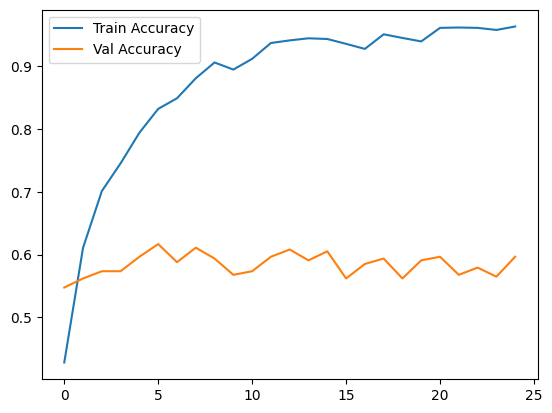

In [50]:
# Answer here
plt.plot(training_log['accuracy'], label='Train Accuracy')
plt.plot(training_log['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

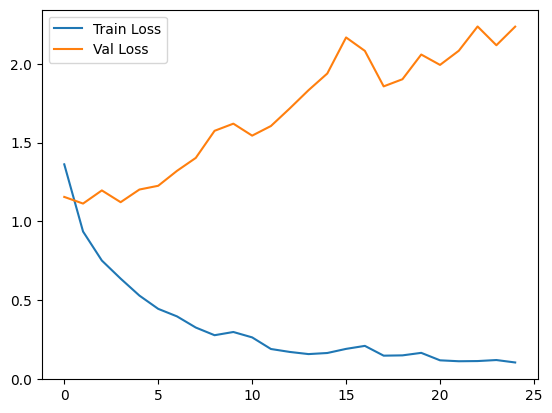

In [51]:
plt.plot(training_log['loss'], label='Train Loss')
plt.plot(training_log['val_loss'], label='Val Loss')
plt.legend()
plt.show()

KNN achieves higher training accuracy, peaking around 0.9–0.95, but suffers from overfitting as its validation accuracy remains significantly lower and fluctuates more across epochs. On the other hand, Naive Bayes has lower overall accuracy but demonstrates better stability, with a smaller gap between training and validation performance. Its validation accuracy is smoother, suggesting it generalizes more consistently. While KNN might seem better for training accuracy, Naive Bayes is a more reliable choice when consistency in validation performance is key.

KNN, while easy to understand and effective for small datasets, struggles with high-dimensional text data and scalability. Neural networks, on the other hand, excel at capturing complex patterns and relationships but require large datasets, extensive computational resources, and careful tuning to perform well. Simpler models like BoW and TF-IDF paired with classifiers like Naive Bayes or Logistic Regression are lightweight, interpretable, and effective for text tasks, particularly when data is sparse or limited.

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.


The comparison between zero-shot, 1-shot, and 5-shot prompting for emotion classification highlights the importance of providing examples to improve model performance. Zero-shot prompting, where no task-specific examples are given, had the lowest accuracy and it struggled particularly with emotions like fear. While it showed relatively better performance for joy, the overall results indicated limited understanding of the task. There were also so many reclassifications necessary due to the invalid results.

With 1-shot prompting, the addition of a single example led to a slight improvement. The model performed better at identifying anger and joy but still struggled with fear, showing that one example isn’t enough for the model to generalize effectively.

5-shot prompting delivered the best results, improving accuracy and reducing misclassifications. It also demonstrated a more balanced understanding across all emotions and had less reclassifications.


# Kaggle report
The report is attached as report.pdf in the github repo